In [1]:
import pandas as pd

In [19]:
url = "https://docs.google.com/spreadsheets/d/1vFWwNJ7-61O_QYaPo8d7bmw7K192az4R/export"
data_excel = pd.read_excel(url, sheet_name=0, header=9)
data_excel = data_excel.iloc[:, :-11]

In [20]:
#Obtengo las columnas que me interesan
#data = data.iloc[:, -10:]
col_sexo = data_excel.iloc[:, 0]
col_baremos = data_excel.iloc[:, -12:]

data  = pd.concat( [col_sexo, col_baremos], axis=1 )
data.head()

,Sexo,Agotamiento Emo.,Somatización,Obsesión/com,Sen. Emocio.,Depresión,Ansiedad,Hostilidad,Ans. Fóbica,Ideación Paran.,Psicoticismo,Agotamiento,SA45
0,1,18,Promedio,Alto,Bajo,Promedio,Promedio,Promedio,Bajo,Bajo,Promedio,Bajo,Bajo
1,1,20,Alto,Promedio,Bajo,Alto,Promedio,Bajo,Promedio,Alto,Bajo,Bajo,Bajo
2,1,33,Bajo,Promedio,Promedio,Bajo,Bajo,Promedio,Bajo,Alto,Bajo,Alto,Bajo
3,1,35,Alto,Alto,Alto,Alto,Alto,Alto,Promedio,Alto,Bajo,Alto,Promedio
4,1,13,Promedio,Bajo,Alto,Alto,Promedio,Bajo,Alto,Alto,Bajo,Bajo,Bajo


In [22]:
#Creo el map
category_map = {
    'Bajo': 0,
    'Promedio': 1,
    'Alto': 2,
    #'En riesgo': 3
}

In [23]:
#Convierto las categorias a numeros
data2 = data.copy()
for i in range(11):
    data2.iloc[:, 2+i ] = data2.iloc[:, 2+i ].map(category_map)

data2.head()

,Sexo,Agotamiento Emo.,Somatización,Obsesión/com,Sen. Emocio.,Depresión,Ansiedad,Hostilidad,Ans. Fóbica,Ideación Paran.,Psicoticismo,Agotamiento,SA45
0,1,18,1,2,0,1,1,1,0,0,1,0,0
1,1,20,2,1,0,2,1,0,1,2,0,0,0
2,1,33,0,1,1,0,0,1,0,2,0,2,0
3,1,35,2,2,2,2,2,2,1,2,0,2,1
4,1,13,1,0,2,2,1,0,2,2,0,0,0


In [24]:
data2.to_csv("respuestas_label.csv")

In [25]:
#Importo Pycaret para clasificacion
from pycaret.classification import *

In [26]:
clf = setup(data2, target='Agotamiento', session_id=123, fold=4)

,Description,Value
0,Session id,123
1,Target,Agotamiento
2,Target type,Multiclass
3,Original data shape,"(372, 13)"
4,Transformed data shape,"(372, 33)"
5,Transformed train set shape,"(260, 33)"
6,Transformed test set shape,"(112, 33)"
7,Numeric features,2
8,Categorical features,10
9,Preprocess,True


In [27]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [28]:
# init setup on exp
exp.setup(data2, target = 'Agotamiento', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Agotamiento
2,Target type,Multiclass
3,Original data shape,"(372, 13)"
4,Transformed data shape,"(372, 33)"
5,Transformed train set shape,"(260, 33)"
6,Transformed test set shape,"(112, 33)"
7,Numeric features,2
8,Categorical features,10
9,Preprocess,True


In [29]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0475
ada,Ada Boost Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0700
gbc,Gradient Boosting Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0925
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,52.2350
lr,Logistic Regression,0.9885,0.0000,0.9885,0.9890,0.9885,0.9820,0.9823,0.4975
knn,K Neighbors Classifier,0.9808,0.9992,0.9808,0.9816,0.9808,0.9701,0.9705,0.4125
rf,Random Forest Classifier,0.9615,0.9952,0.9615,0.9632,0.9617,0.9398,0.9404,0.1075
lda,Linear Discriminant Analysis,0.8962,0.0000,0.8962,0.9068,0.8979,0.8391,0.8430,0.0475
svm,SVM - Linear Kernel,0.8423,0.0000,0.8423,0.8604,0.8417,0.7520,0.7616,0.0550
et,Extra Trees Classifier,0.8038,0.9344,0.8038,0.8070,0.8019,0.6928,0.6960,0.1050


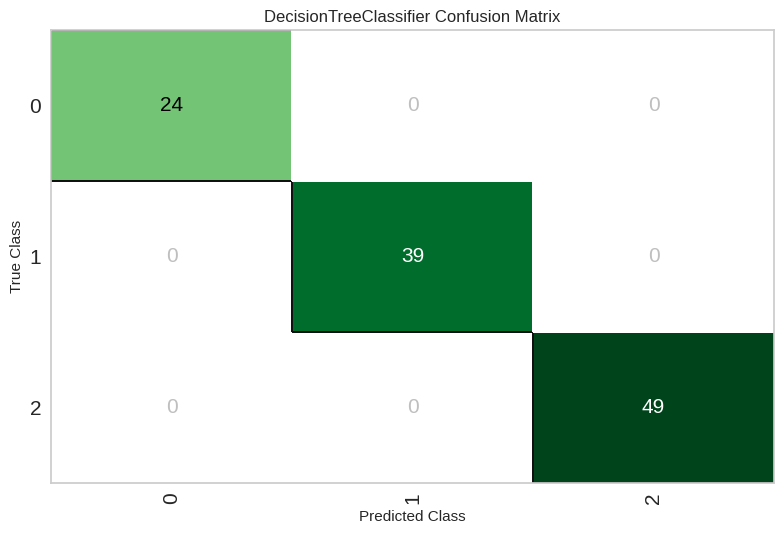

In [30]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

In [31]:
from pycaret.classification import save_model

# Guardar el modelo entrenado
save_model(best, 'modelo-SA45-ECE_Sexo_SA45-total')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Sexo', 'Agotamiento Emo.'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Somatización', 'O...
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
   